# Mel-Spectrograms 

I'll try to go into a bit more detail in mel-spectrograms here since seeing it visually helped me understand it. Since the Mel-spectrogram is a visualisation method of audio lets start form the ground up. Build up to the spectrogram and then understand mel scale - finisihing with the mel spectrogram. 

### Spectrograms
Lets start by just loading audio files using librosa, we will use a audio file we use later on too. We want to display it normally, then we will look at measuring the change in pressure around the microphone, and compare that to the time taken.

So - Y-axis = change in pressure around microphone, X-axis = time

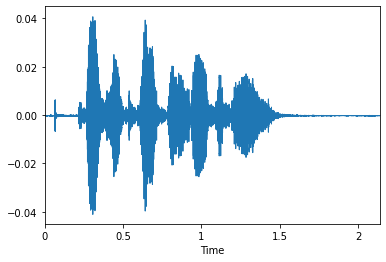

In [4]:
import librosa
import librosa.display

audioFileLocation = "../data/Actor_01/03-01-01-01-01-01-01.wav"
timeSeries, sampleRate = librosa.load(audioFileLocation)  # Load the audio file in as a time series, and a sample rate

audioVisualised, _ = librosa.effects.trim(timeSeries) # trim silent edges
librosa.display.waveplot(audioVisualised, sr=sampleRate); # display it 

Okay cool, now we can also represent it as a Fourier transformation, this allows us to convert the pressure time graph into a frequency time graph. It is used a lot because the microphone has a lot of different freuquencies in it, and the superposition of these signals is a going to make our wave look so so weird. 

Basically the Fourier transform is going to have peaks well above 0 ar the appropriate frequencies - It's really hard to explain - wrapping the pressure around a circle, then calculating its center of mass (x,y), and then plotting the x axis against a graph will peak at different frequencies <- Please watch a youtube video on it. 

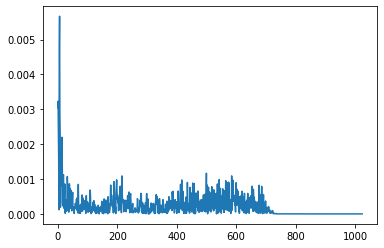

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048 # this is the number of rows in the fourier transform
D = np.abs(librosa.stft(audioVisualised[:n_fft], n_fft=n_fft, hop_length=n_fft+1))# the hop length is the samples between successive frames so like frame rate?
plt.plot(D);

From this we can see the frequencies said. (If you did the initial research you'd note the 0 spike is due to us transforming the cosine) 

Now that we've for frequency against time lets look at a Spectrogram, to do this we separate out the graph into time against frequency, and in each value we can calculate the intensity of the sound.

(we make the scale logarithmic because human hearing isn't that impressive - sorry not sorry)

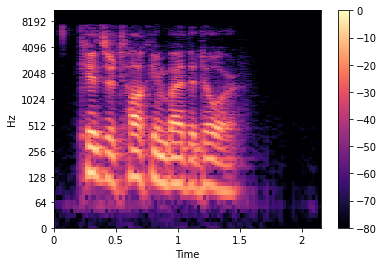

In [9]:
hop_length = 512
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar();

Boom!!
Here is a spectrogram!

Thats the first leg of this explanation complete.

Now we move onto the Mel Scale

### Mel Scale

The Mel Scale is a scale of frequency such that different frequencies are a good distance between each other. Okay, bad explanation, but think of the difference between 100 and 1000hz and then think of the difference between 7100hz and 8000hz (100-1000hz is more noticable). So the Mel scale just adjusts it for us by applying a sort of log function to the frequency.


![Image of the Mel Scale](https://www.sfu.ca/sonic-studio-webdav/handbook/Graphics/Mel.gif)

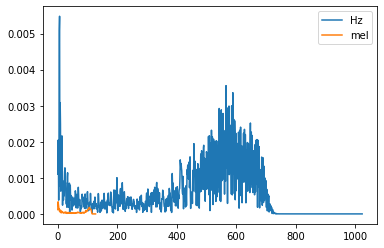

In [14]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)


plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']); # You can see the difference, the mel value is a lot easier ot interpret.

### Mel-Spectrogram
Now this is just a spectrogram that replaces the y axis from hertz to the mel value:

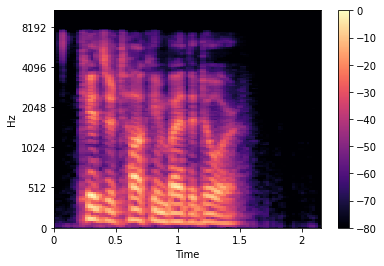

In [16]:
S = librosa.feature.melspectrogram(audioVisualised, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar();